Código de realização do trabalho

Bibliotecas

In [159]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 
plt.rcParams.update({'font.size':16}) # Definição de parametros de todos os plots

Coletando os dados do arquivo

In [160]:
dados = np.loadtxt('dados.txt', skiprows=1) # Coleta de dados usando o arquivo gerado pelo tracker
t = dados[:,0]
x = dados[:,1]
y = dados[:,2]

Definindo funções

In [161]:
def funcx(t,vx,x0):
    f = vx*t+x0
    return f

def funcy(t,c1,c2,c3):
    f = c1*t**2+c2*t+c3
    return f

def trajetoria(t,p1,p2,p3):
    f = p1*t**2+p2*t+p3
    return f

def reta(t,a,vy0):
    f = a*t +vy0 
    return f

Definição das variáveis

In [162]:
tamanho = dados.shape[0] # Definindo o tamanho 
t_step=t[0] # Definindo t_step com base na lista t do arquivo
vx,x0=np.polyfit(t,x,1) # Definindo V em x e x inicial
c1,c2,c3=np.polyfit(t,y,2) # Definindo as constantes C1, C2 e C3
p1,p2,p3=np.polyfit(x,y,2) # Definindo as constantes p1, p2 e p3
vx = np.zeros(tamanho)
vy = np.zeros(tamanho)
vx[0]=(x[1]-x[0])/t_step
vy[0]=(y[1]-y[0])/t_step
vx[-1]=(x[tamanho-1]-x[tamanho-2])/t_step
vy[-1]=(y[tamanho-1]-y[tamanho-2])/t_step
for i in range(1,tamanho-1):
    vx[i]=(x[i+1]-x[i-1])/(2*t_step)
    vy[i]=(y[i+1]-y[i-1])/(2*t_step)
a,vy0=np.polyfit(t,vy,1) # Definindo aceleração e V em y inicial


Gráfico x(t)

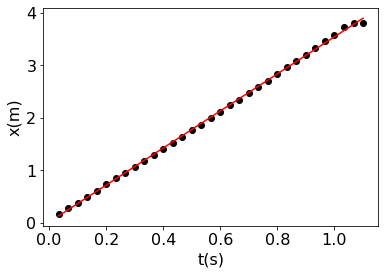

In [163]:
plt.scatter(t,x,color='black') 
plt.plot(t,funcx(t,vx,x0),color='red',linestyle='solid')
plt.ylabel('x(m)')
plt.xlabel(r't(s)')
plt.savefig('x(t).png')

Velocidade em x média

In [164]:
vx.mean() # V em x médio

3.5334324018185814

Gráfico y(t)

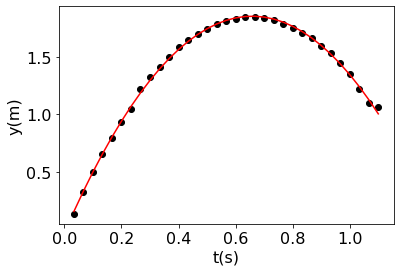

In [166]:
plt.scatter(t,y,color='black')
plt.plot(t,funcy(t,c1,c2,c3),color='red',linestyle='solid')
plt.ylabel('y(m)')
plt.xlabel(r't(s)')
plt.savefig('y(t).png')

Valor da gravidade estimado 1

In [167]:
g=-c1*2 # Calculando a gravidade
print(g)

8.711169512170969


Erro relativo ao valor da gravidade estimado 1

In [168]:
erro1=(9.81-g)/9.81
erro1.round(2) # Calculando o erro relativo da gravidade encontrada

0.11

Gráfico y por x

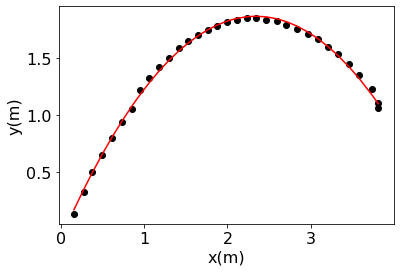

In [170]:
plt.scatter(x,y,color='black')
plt.plot(x,trajetoria(x,p1,p2,p3),color='red',linestyle='solid')
plt.ylabel('y(m)')
plt.xlabel(r'x(m)')
plt.savefig('y(x).png')

Valor da velocidade em x média 2

In [175]:
vx.mean()

3.376364587821365

Gráfico Vx(t)

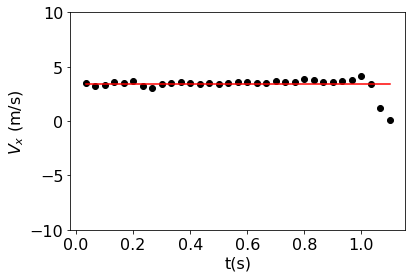

In [176]:
plt.scatter(t,vx, color='black')
plt.ylabel(r'$V_x$ (m/s)')
plt.xlabel(r't(s)')
plt.ylim(-10,10)
plt.plot([t.min(),t.max()],[vx.mean(),vx.mean()],color='red', linestyle='solid')
plt.savefig('Vx(t).png')

Gráfico Vy(t)

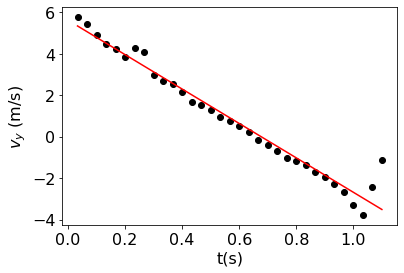

In [178]:
plt.scatter(t,vy,color='black')
plt.plot(t,reta(t,a,vy0), color='red', linestyle='solid')
plt.ylabel(r'$v_y$ (m/s)')
plt.xlabel(r't(s)')
plt.savefig('Vy(t).png')

Valor da gravidade estimado 2

In [179]:
g2=-a # Gravidade obtida pela aceleração estimada
print(g2)

8.308909400370085


Erro relativo ao valor da gravidade estimado 2

In [180]:
erro2 = (9.81-g2)/9.81 # Erro relativo a gravidade encontrada acima
erro2.round(2)

0.15